In [2]:
#Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Problem Statement

## Logistic Regression analysis and prediction of credit card approvals


Companies have to go through a series of processes to approve a credit card to a person. This process is tedious and mundane. Every time an application is submitted bank has to analyze certain factors that play a vital role in the approval of the credit card, such as the income of the applicant, credit score, employment status, etc. This can be automated using Logistic regression analysis which can be used to understand the factors which have the most effect on the decision-making process of credit card approval. In order to achieve this, a logistic regression model can be trained to predict the probability of credit card approval based on the features from the data set. afterward, the trained logistic regression model can be analyzed to get insights into different features that have the highest impact on the approval rate.

# Solution


## Exploratory Data Analysis

We start off by understanding the type of data in the dataframe. We can see from the below summary that there are 15 variables associated with credit card approval or denial. The outcome values of the last column __approved__ are the following symbols, "+" means approved and "-" means denied. These symbols are not meaningful, so we will be transforming that to 1's and 0's for the regression analysis.


In [3]:
# Loading the dataset

credit_df = pd.read_csv("crx.csv", names = ["Male", "Age", "Debt", "Married", "Bank_Customer", "Education_Level",
                                           "Ethnicity", "Years_Employed", "Prior_Default", "Employed", "Credit_Score",
                                           "Driverse_License", "Citizen", "Zip", "Income", "Approved"])
credit_df.head(6)


,Male,Age,Debt,Married,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Employed,Credit_Score,Driverse_License,Citizen,Zip,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


There are five continuous variables in the dataset. We will check the relationship between these variables and credit card approval before jumping to regression analysis. Box plot is used here to understand the correlation between __Age_, _Income_, _Debt_, _CreditScore_, _Years_Employed_, and the approval rate__. The below box plots of these continuous variables show that the means of the features of the approved applications are further distributed from the mean of the denied.


In [7]:
# Filter out non-numeric values to see how many are there.  
non_numeric_rows = credit_df[pd.to_numeric(credit_df['Age'], errors='coerce').isna()]

# Display rows where columns contains non-numeric values
print("Rows where column contains non-numeric values:", len(non_numeric_rows ))


Rows where column contains non-numeric values: 12


In [8]:
#Let's factorize Approved column, and convert Age to int
credit_df["Approved"] = credit_df["Approved"].replace({"+": 1, "-": 0}, inplace = False)
credit_df['Age'] = pd.to_numeric(credit_df['Age'], errors='coerce') 
credit_df.dropna(subset=['Age'], inplace=True)
credit_df['Age'] = credit_df['Age'].round().astype(int)

In [9]:
credit_df.head(6)

,Male,Age,Debt,Married,Bank_Customer,Education_Level,Ethnicity,Years_Employed,Prior_Default,Employed,Credit_Score,Driverse_License,Citizen,Zip,Income,Approved
0,b,31,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,59,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,28,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1
5,b,32,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,1


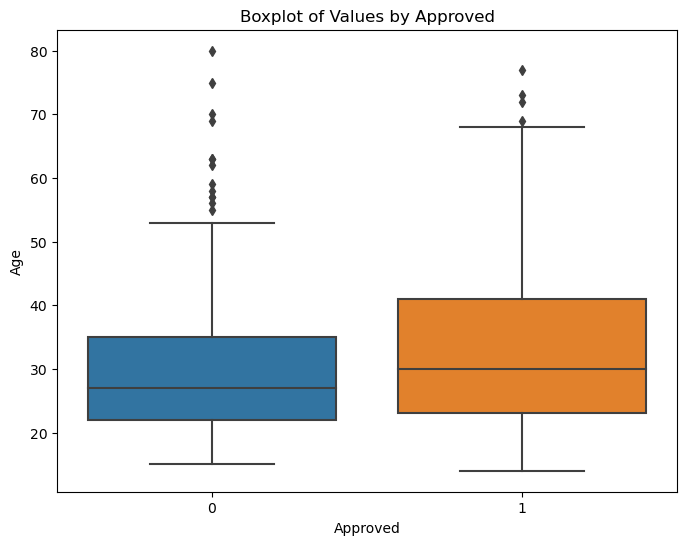

In [5]:
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Approved', y='Age', data=credit_df)
plt.title('Boxplot of Values by Approved')
plt.xlabel('Approved')
plt.ylabel('Age')
plt.show()





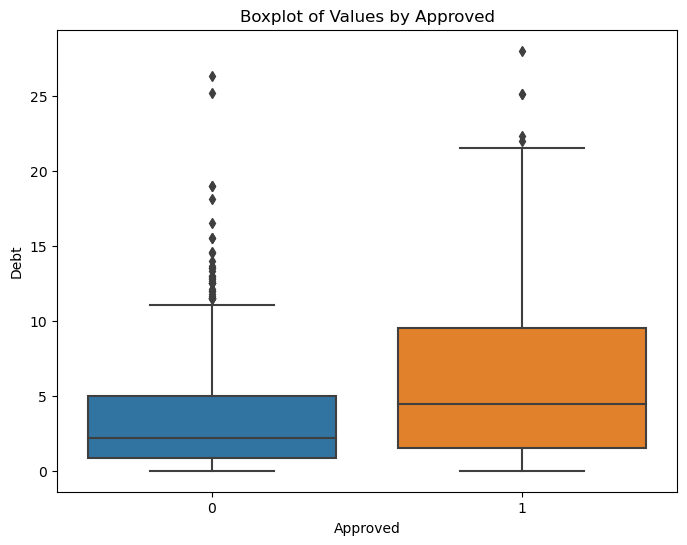

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Approved', y='Debt', data=credit_df)
plt.title('Boxplot of Values by Approved')
plt.xlabel('Approved')
plt.ylabel('Debt')
plt.show()



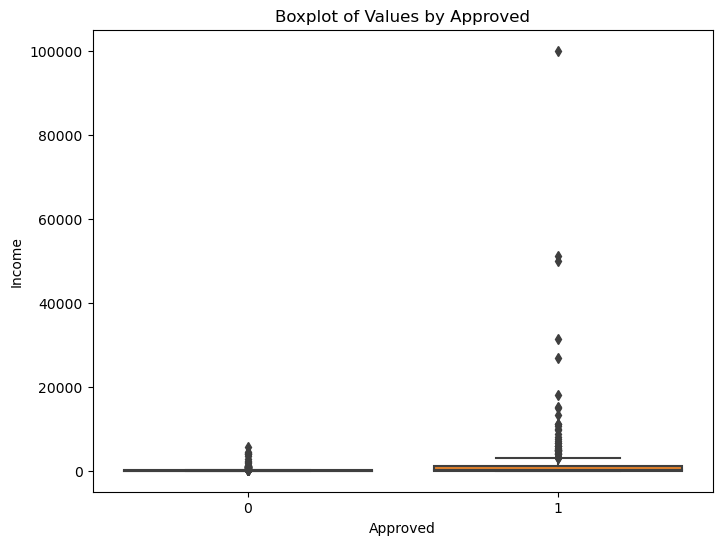

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Approved', y='Income', data=credit_df)
plt.title('Boxplot of Values by Approved')
plt.xlabel('Approved')
plt.ylabel('Income')
plt.show()



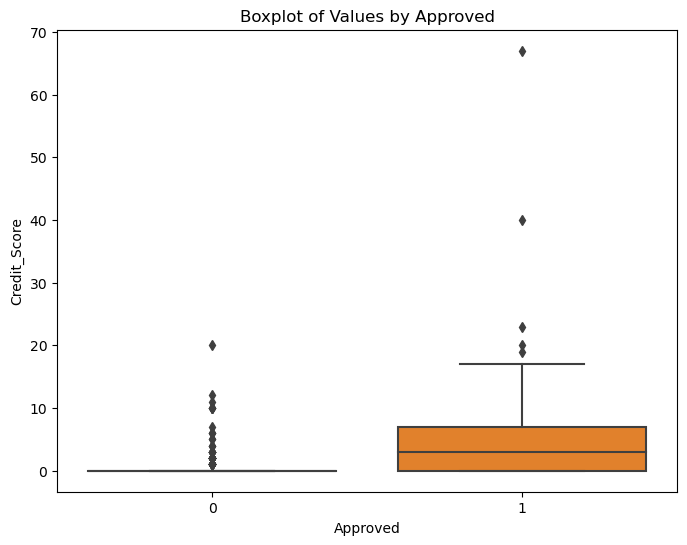

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Approved', y='Credit_Score', data=credit_df)
plt.title('Boxplot of Values by Approved')
plt.xlabel('Approved')
plt.ylabel('Credit_Score')
plt.show()



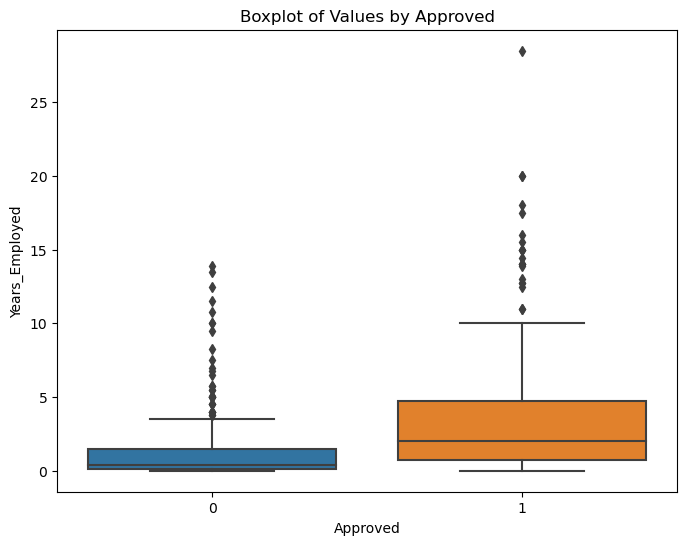

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Approved', y='Years_Employed', data=credit_df)
plt.title('Boxplot of Values by Approved')
plt.xlabel('Approved')
plt.ylabel('Years_Employed')
plt.show()

## Modeling 

The next step is to perform logistic regression on the five variables identified from the dataset. The Akaike Information Criterion(AIC) value tells us the quality of our model. Summary of the regression can be used to interpret the factors that have a significant influence on the approval of a credit card application.

To effectively evaluate the regression model trained, the dataset needs to be partitioned as train and test data. 75% of the dataset is used for training and the rest is used to predict the credit card application approval. The confusion matrix tells us how accurate the prediction is.


In [63]:
#Preprocess the dataset

X = credit_df[["Age", "Debt", "Years_Employed", "Credit_Score", "Income"]]
y = credit_df["Approved"]

In [64]:
#Split the data into train, test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [65]:
#standerize the features 

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [66]:
#fit logistic regression

logit_model = sm.Logit(y_train, sm.add_constant(X_train_scaled))
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.499919
         Iterations 8


In [67]:
# Get predicted probabilities and classes for the test set
y_prob = result.predict(sm.add_constant(X_test_scaled))
y_pred = (y_prob > 0.5).astype(int)


In [68]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[75  5]
 [18 38]]


In [69]:
report = classification_report(y_test, y_pred, digits = 4)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0     0.8065    0.9375    0.8671        80
           1     0.8837    0.6786    0.7677        56

    accuracy                         0.8309       136
   macro avg     0.8451    0.8080    0.8174       136
weighted avg     0.8383    0.8309    0.8261       136



The confusion matrix above gives the actual values and predicted values. 75 is the number of credit card applications correctly predicted as denied out of 93 (80.65% accuracy) and 38 is the number of applications correctly predicted as granted out of 43 (93.75% accuracy). Rest are Type 1 and Type 2 errors in the prediction. Approximately, the model is 75.28% accurate in predicting credit card approval.


In [36]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Approved   No. Observations:                  542
Model:                          Logit   Df Residuals:                      536
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.2753
Time:                        08:32:45   Log-Likelihood:                -270.96
converged:                       True   LL-Null:                       -373.90
Covariance Type:            nonrobust   LLR p-value:                 1.565e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2812      0.138      2.045      0.041       0.012       0.551
x1             0.0591      0.112      0.527      0.599      -0.161       0.279
x2             0.1610      0.110      1.460      0.1

In [37]:
print(result.aic)

553.9118699975294


We develop a multiple regression equation using __Age, Debt, Years_Employed, Credit_Score, and Income__ to predict credit card approval and check how well the regression model explains the variability in credit card approval.

$ \text{Log odds of Approval} = 0.0591 \times \text{Age} + 0.1610 \times \text{Debt} + 0.6290 \times \text{Years_Employed} + 1.5468 \times \text{Credit_Score} + 1.6907 \times \text{Income} + 0.2812 $


From the summary of the regression model, we can see that __YearsEmployed_, _CreditScore_, and _Income__ has a high significance in predicting the credit card application approval or denial. These factors are significant with a __p-value__ of 0.000. Other features like __Age and Debt__ does not seem to have much significance in predicting the approval of credit card applications because the __p-value__ is much higher for these features.

The Pseudo $R^2$ value of the model is __0.2753__ and the log-likelihood of the fitted model is __-270.96__, that means the deviance for the model is **−2×(−270.96)=2×270.96=541.92**. The log-likelihood of the null model which is __-373.90__, which means the deviance for the model is **−2×(−373.90)=2×373.90=747.80.** This suggests that  the goodness of fit is higher when we include the predictors in the regression model. 


From this model, we found that only three factors have a significant influence on predicting approval rate. So in the next step, we will perform another regression model by removing the least significant features such as Age and Debt from the model and analyze the difference in diviance and other factors.

## Model 2

In [73]:
#Preprocess the dataset for model 2

X1 = credit_df[["Years_Employed", "Credit_Score", "Income"]]
y1 = credit_df["Approved"]

#Split the data into train, test set

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)

#standerize the features 

scalar1 = StandardScaler()
X1_train_scaled = scalar1.fit_transform(X1_train)
X1_test_scaled = scalar1.transform(X1_test)

#fit logistic regression

logit_model1 = sm.Logit(y1_train, sm.add_constant(X1_train_scaled))
result1 = logit_model1.fit()

# Get predicted probabilities and classes for the test set
y1_prob = result1.predict(sm.add_constant(X1_test_scaled))
y1_pred = (y1_prob > 0.5).astype(int)



Optimization terminated successfully.
         Current function value: 0.502180
         Iterations 8


In [74]:
# Confusion matrix
conf_matrix1 = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:\n", conf_matrix1)


Confusion Matrix:
 [[75  5]
 [19 37]]


In [79]:
75+37/(75+19+5+37)

75.2720588235294

The confusion matrix above also shows there is no change in the prediction of credit card approval after simplifying the model. This shows that the predictability of the model stays still **75.27%** even after removing less influencing factors such as **Age and Debt**.


In [75]:
report1 = classification_report(y1_test, y1_pred, digits = 4)

# Print the classification report
print("Classification Report:")
print(report1)

Classification Report:
              precision    recall  f1-score   support

           0     0.7979    0.9375    0.8621        80
           1     0.8810    0.6607    0.7551        56

    accuracy                         0.8235       136
   macro avg     0.8394    0.7991    0.8086       136
weighted avg     0.8321    0.8235    0.8180       136



In [76]:
print(result1.summary())

                           Logit Regression Results                           
Dep. Variable:               Approved   No. Observations:                  542
Model:                          Logit   Df Residuals:                      538
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.2720
Time:                        11:31:44   Log-Likelihood:                -272.18
converged:                       True   LL-Null:                       -373.90
Covariance Type:            nonrobust   LLR p-value:                 7.646e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.137      2.003      0.045       0.006       0.544
x1             0.6662      0.140      4.767      0.000       0.392       0.940
x2             1.5574      0.224      6.944      0.0

In [77]:
print(result1.aic)

552.3629577810977


In [78]:
print(result.aic)

553.9118699975294


Above is the simplified model by removing Age and Debt from our previous model. It can be seen that from the summary of regression the AIC has reduced to 552.36, which was earlier 553.91. The AIC shows the quality of a model, the lower the AIC better the model is. So from this, we can say that the simplified model is better than the first model even though the value in AIC is only sightly less. Moreover, there is not much change in the deviances when compared to the previous complex model.

## Conclusion


From the analysis, we found out that the variables that have a major impact on the variances in credit card approval are __Income, Years_Employed, and Credit_Score__. The AIC of the model is low, with 552.36. This model is significant at $\alpha$ = 0.001 or 99.9% level.